In [ ]:
import numpy as np
import pandas as pd

In [ ]:
nov_dec_defer_df = pd.read_csv('novdec_defer.csv')

In [ ]:
nov_dec_2020_df = pd.read_csv('nov_dec_2020.csv')

In [ ]:
nov_dec_defer_df

,time,power
0,2020-11-01 00:00:00,0.000000
1,2020-11-01 01:00:00,0.000000
2,2020-11-01 02:00:00,0.000000
3,2020-11-01 03:00:00,0.000000
4,2020-11-01 04:00:00,0.000000
...,...,...
1459,2020-12-31 19:00:00,0.000000
1460,2020-12-31 20:00:00,0.000000
1461,2020-12-31 21:00:00,0.000000
1462,2020-12-31 22:00:00,2.614846


In [ ]:
nov_dec_defer_df['power'].sum()

1219.2946506920475

In [ ]:
nov_dec_2020_df['power'].sum()

2928.088216614839

In [ ]:
nov_dec_2020_df

,power
0,0.000000
1,0.000000
2,0.000000
3,0.000000
4,0.000000
...,...
1459,0.000000
1460,0.000000
1461,1.999273
1462,17.927538


In [116]:
import numpy as np
import pandas as pd

num_points = 744 + 720

# Step 1: Initialization
D = np.zeros(num_points)  # Initialize D(t) for each hour t
alpha = 0.1  # Set alpha
learning_rate = 0.01  # Set learning rate
iterations = 400000  # Set number of iterations
# iterations = 300
# Define maximum value for each D(t)
nov_dec_defer_df = pd.read_csv('novdec_defer.csv')
D_max = nov_dec_defer_df['power'].values
D = np.random.uniform(1, 10, size=num_points)  # Example random maximum values
# # Original consumption data P0(t) - You need to provide this data
# P0 = np.random.rand(num_points)  # Example random data

# Read 'power' column from nov_dec_2020.csv file
nov_dec_2020_df = pd.read_csv('nov_dec_2020.csv')
P0 = nov_dec_2020_df['power'].values

print(P0)
print(D_max)
D_max = P0 - D_max

print(D_max)

# D = D_max.copy()


# Step 2: Compute Cost Function
def compute_cost(D, P0, alpha):
    P = P0 - D + np.roll(D, 1)  # Compute consumption at each hour
    P1 = np.max(P[:720])  # Max consumption in first month
    P2 = np.max(P[720:])  # Max consumption in second month
    return P1 + P2 + alpha * np.sum(D)

# Step 3: Compute Gradients
def compute_gradients(D, P0, alpha):
    gradients = np.zeros(num_points)
    P = P0 - D + np.roll(D, 1)
    t1 = np.argmax(P[:720])  # Find time t1 where P1 is highest
    t2 = np.argmax(P[720:]) + 720  # Find time t2 where P2 is highest
    gradients[t1] += -1 + alpha  # Update gradient for t1
    gradients[t2] += -1 + alpha  # Update gradient for t2
    gradients[(gradients == 0)] = alpha  # Update gradients for other times
    return gradients

# Step 4: Update Parameters
def update_parameters(D, gradients, learning_rate, D_max):
    D -= learning_rate * gradients
    # Clip values to stay within the maximum constraints

    D = np.clip(D, 0, np.maximum(0, D_max))
    # print(D)
    return D

cost_data = []
# Step 5: Repeat
for i in range(iterations):
    # Step 2: Compute Cost Function
    cost = compute_cost(D, P0, alpha)

    # Step 3: Compute Gradients
    gradients = compute_gradients(D, P0, alpha)

    # Step 4: Update Parameters
    D = update_parameters(D, gradients, learning_rate, D_max)

    cost_data.append(cost)

    if i == iterations-1:
      print(D)
      print(min(D))
      print(max(D))
    # Print cost every 100 iterations
    # if i % 100 == 0:
    #     print("Iteration:", i, "Cost:", cost)

print('cost: ', cost)
print(max(D))
print("Optimized parameters D:", D)


[0.         0.         0.         ... 7.07353119 8.33950266 8.29092255]
[0.         0.         0.         ... 0.         2.6148456  4.54536175]
[0.         0.         0.         ... 7.07353119 5.72465706 3.74556081]
[0. 0. 0. ... 0. 0. 0.]
0.0
9.372439386943721
cost:  45.683405140430196
9.372439386943721
Optimized parameters D: [0. 0. 0. ... 0. 0. 0.]


In [65]:
min(D)

0.0

In [117]:
import matplotlib.pyplot as plt

def plot_graph(D_max):
    # Create x-axis values from 1 to the length of D_max
    x = list(range(1, len(D_max) + 1))

    # Plot the graph
    plt.plot(x, D_max, marker='o', linestyle='-')

    # Add labels and title
    plt.xlabel('Hourly Point')
    plt.ylabel('Cost')
    plt.title('Graph of Iterations Vs. Cost')

    # Show the plot
    plt.show()


# def plot_graph(D_max, P0):
#     # Create x-axis values from 1 to the length of D_max
#     x = list(range(1, len(D_max) + 1))

#     # Plot D_max
#     plt.plot(x, D_max, marker='o', linestyle='-', label='D_max')

#     # Plot P0 in red color
#     plt.plot(x, P0, marker='s', linestyle='-', color='red', label='P0')

#     # Add labels and title
#     plt.xlabel('Index')
#     plt.ylabel('Values')
#     plt.title('Graph of D_max and P0')

#     # Add legend
#     plt.legend()

#     # Show the plot
#     plt.show()

P_optimized = P0 - D + np.roll(D, 1)

# Assuming P_optimized is your array
# Find the maximum value from the first 720 elements
first_max = max(P_optimized[:720])

# Find the maximum value from the remaining elements
second_max = max(P_optimized[720:])

print("First max:", first_max)
print("Second max:", second_max)

# plot_graph(data)
# plot_graph(P_optimized)



First max: 24.22987318024684
Second max: 18.42075849269927


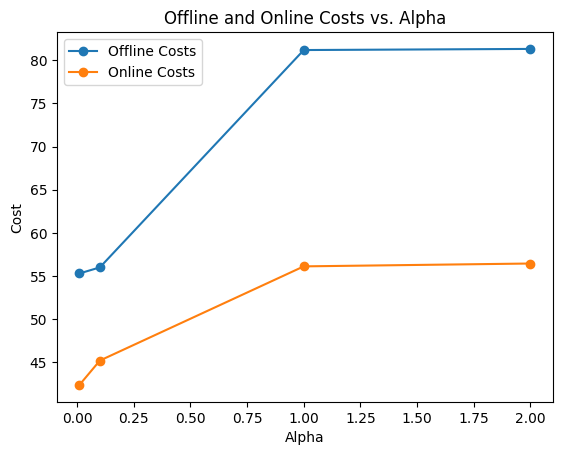

In [110]:
import matplotlib.pyplot as plt

# Data
alpha = [0.01, 0.1, 1, 2]
offline_costs = [55.3, 56, 81.19, 81.32]
online_costs = [42.38, 45.2, 56.12, 56.45]

# Plot
plt.plot(alpha, offline_costs, marker='o', linestyle='-', label='Offline Costs')
plt.plot(alpha, online_costs, marker='o', linestyle='-', label='Online Costs')

# Labels and Title
plt.xlabel('Alpha')
plt.ylabel('Cost')
plt.title('Offline and Online Costs vs. Alpha')
plt.legend()

# Show the plot
plt.show()


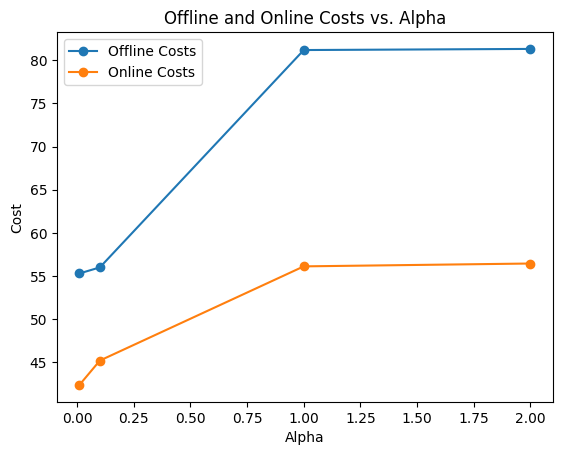

In [111]:
import matplotlib.pyplot as plt

# Data
alpha = [0.01, 0.1, 1, 2]
offline_costs = [55.3, 56, 81.19, 81.32]
online_costs = [42.38, 45.2, 56.12, 56.45]

# Plot
plt.plot(alpha, offline_costs, marker='o', linestyle='-', label='Offline Costs')
plt.plot(alpha, online_costs, marker='o', linestyle='-', label='Online Costs')

# Labels and Title
plt.xlabel('Alpha')
plt.ylabel('Cost')
plt.title('Offline and Online Costs vs. Alpha')
plt.legend()

# Show the plot
plt.show()


In [113]:
import pandas as pd

# Load the CSV file
df = pd.read_csv("nov_dec_predicted.csv")

# Select the first 720 rows and find the maximum value in the 'power' column
first_max = df.head(720)['power'].max()

# Select the remaining rows and find another maximum value in the 'power' column
second_max = df.tail(len(df) - 720)['power'].max()

print("First max:", first_max)
print("Second max:", second_max)


First max: 33.60144081172492
Second max: 22.853418304649303
